In [6]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import math 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Pair Programming Estandarización

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

- Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv('datos/soci_econ_country_profiles_v4.csv', index_col=0)
df.head()

,country,Region,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.),QOL_NORM,QOL_LOG,QOL_RAIZ,QOL_MinMaxScaler,QOL_BOX
0,Argentina,SouthAmerica,14564.5,2.0,73.1,119,91.8,1.0,2.3,13.7,38.9,256,85,99.0,139.59,58.40,37.37,73.30,12.07,37.95,53.33,90.67,0.30,52.57,112.887108,9.124315,0.611,NaN,76.372000,74.4,96.2,98.3,24.9,15.4,106.85,83.20,0.022280,4.938710,11.814821,0.670794,4156.098775
1,Australia,Oceania,51352.2,2.7,76.1,111,89.4,1.5,1.9,3.9,28.7,948,222,100.0,176.54,101.94,57.58,74.25,9.24,34.73,24.58,72.79,1.41,80.66,115.686785,9.205948,0.803,1.948647,82.500000,70.7,100.0,100.0,19.0,21.0,137.45,90.85,0.261826,5.173547,13.286836,0.910340,6353.265056
2,Austria,WesternEurope,44117.7,4.7,69.7,108,66.0,0.4,1.4,3.3,30.6,118,158,100.0,190.37,95.66,80.75,80.91,9.66,26.27,21.90,62.13,1.69,71.52,113.999737,10.396617,0.793,2.081269,81.643902,65.8,100.0,100.0,14.1,25.1,100.00,81.75,0.351485,5.248970,13.797464,1.000000,7280.981397
3,Belarus,EasternEurope,5750.8,9.6,58.4,122,76.7,0.0,1.6,3.6,34.5,25,122,99.9,119.23,36.43,77.74,53.76,18.73,27.66,39.64,20.07,0.17,33.84,NaN,5.925786,NaN,6.031837,74.129268,67.8,94.1,95.2,16.7,21.3,107.10,88.30,-0.109714,4.781054,10.919249,0.538801,3125.687371
4,Belgium,WesternEurope,40277.8,1.2,77.6,108,97.9,0.5,1.8,3.5,38.0,37,196,100.0,160.52,91.02,55.49,78.92,6.96,36.26,48.92,75.16,2.24,75.36,113.128903,10.338669,0.757,2.125971,81.492683,58.9,99.5,99.4,17.1,24.6,167.05,75.20,0.157968,5.078419,12.669649,0.806483,5349.788533


In [4]:
col_drop = ["QOL_NORM", "QOL_LOG", "QOL_RAIZ", "QOL_MinMaxScaler", "QOL_BOX"]
df.drop(columns=col_drop, inplace=True)

In [5]:
numericas = df.select_dtypes(include = np.number)
numericas.drop("Quality Of Life Index", axis = 1, inplace=True)

### Método StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(numericas)
X_escaladas = scaler.transform(numericas)

In [8]:
numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
0,-0.446268,-0.779156,0.604781,0.453905,1.136844,-0.141090,0.832595,0.403148,1.373669,-0.160445,-0.428847,-0.072257,-0.488363,-1.851319,0.742124,0.011008,0.241153,0.072085,1.046291,-1.225032,-0.142582,-0.361547,0.595817,-0.691809,NaN,-0.376146,0.534838,0.220883,0.590834,0.998345,-0.493168,0.128973,0.934014
1,1.346217,-0.715406,0.840977,0.020821,1.001917,0.279591,0.111013,-0.501415,0.436646,1.692397,0.740796,0.579071,1.026816,-0.290193,0.842922,-0.464307,-0.221396,-1.270303,0.568435,0.097321,1.208398,-0.285638,0.626171,1.022784,-0.267149,1.033843,0.058083,0.681103,0.695233,-0.023719,0.248316,1.683651,1.274595


In [10]:
for columna in numericas_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_estandar[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna GDP per capita (current US$) es:  6.832141690000964e-18
La desviación estándar de la columna GDP per capita (current US$) es: 1.0077822185373184
-------------------------------------------------------------
La media de la columna Employment: Agriculture (% of employed) es:  5.465713352000771e-17
La desviación estándar de la columna Employment: Agriculture (% of employed) es: 1.0077822185373186
-------------------------------------------------------------
La media de la columna Employment: Services (% of employed) es:  -2.7328566760003855e-16
La desviación estándar de la columna Employment: Services (% of employed) es: 1.0077822185373186
-------------------------------------------------------------
La media de la columna Agricultural production index (2004-2006=100) es:  1.1614640873001638e-16
La desviación estándar de la columna Agricultural production index (2004-2006=100) es: 1.0077822185373189
-------------------------------------------------------------
La me

In [12]:
numericas_estandar.describe().T

,count,mean,std,min,25%,50%,75%,max
GDP per capita (current US$),65.0,6.832142e-18,1.007782,-1.087203,-0.860840,-0.372303,0.814461,2.782580
Employment: Agriculture (% of employed),65.0,5.465713e-17,1.007782,-0.943086,-0.715406,-0.423975,0.422995,3.073191
Employment: Services (% of employed),65.0,-2.732857e-16,1.007782,-2.694081,-0.552576,0.179630,0.840977,1.533816
Agricultural production index (2004-2006=100),65.0,1.161464e-16,1.007782,-4.147610,-0.466398,0.020821,0.508041,2.348647
Urban population (% of total population)_x,65.0,-3.416071e-17,1.007782,-2.989663,-0.622825,0.136138,0.709576,1.597843
Urban population growth rate (average annual %),65.0,-9.564998e-17,1.007782,-1.403133,-0.645907,-0.141090,0.447864,4.065721
"Fertility rate, total (live births per woman)",65.0,1.554312e-16,1.007782,-1.151756,-0.610570,-0.249778,0.291408,3.358133
Infant mortality rate (per 1000 live births,65.0,1.639714e-16,1.007782,-0.713710,-0.547566,-0.409112,0.172392,5.581308
Seats held by women in national parliaments %,64.0,1.465841e-16,1.007905,-2.199879,-0.665734,-0.197223,0.824775,1.805434
Individuals using the Internet (per 100 inhabitants),65.0,8.710981e-17,1.007782,-0.784307,-0.669173,-0.495135,0.192987,3.205194


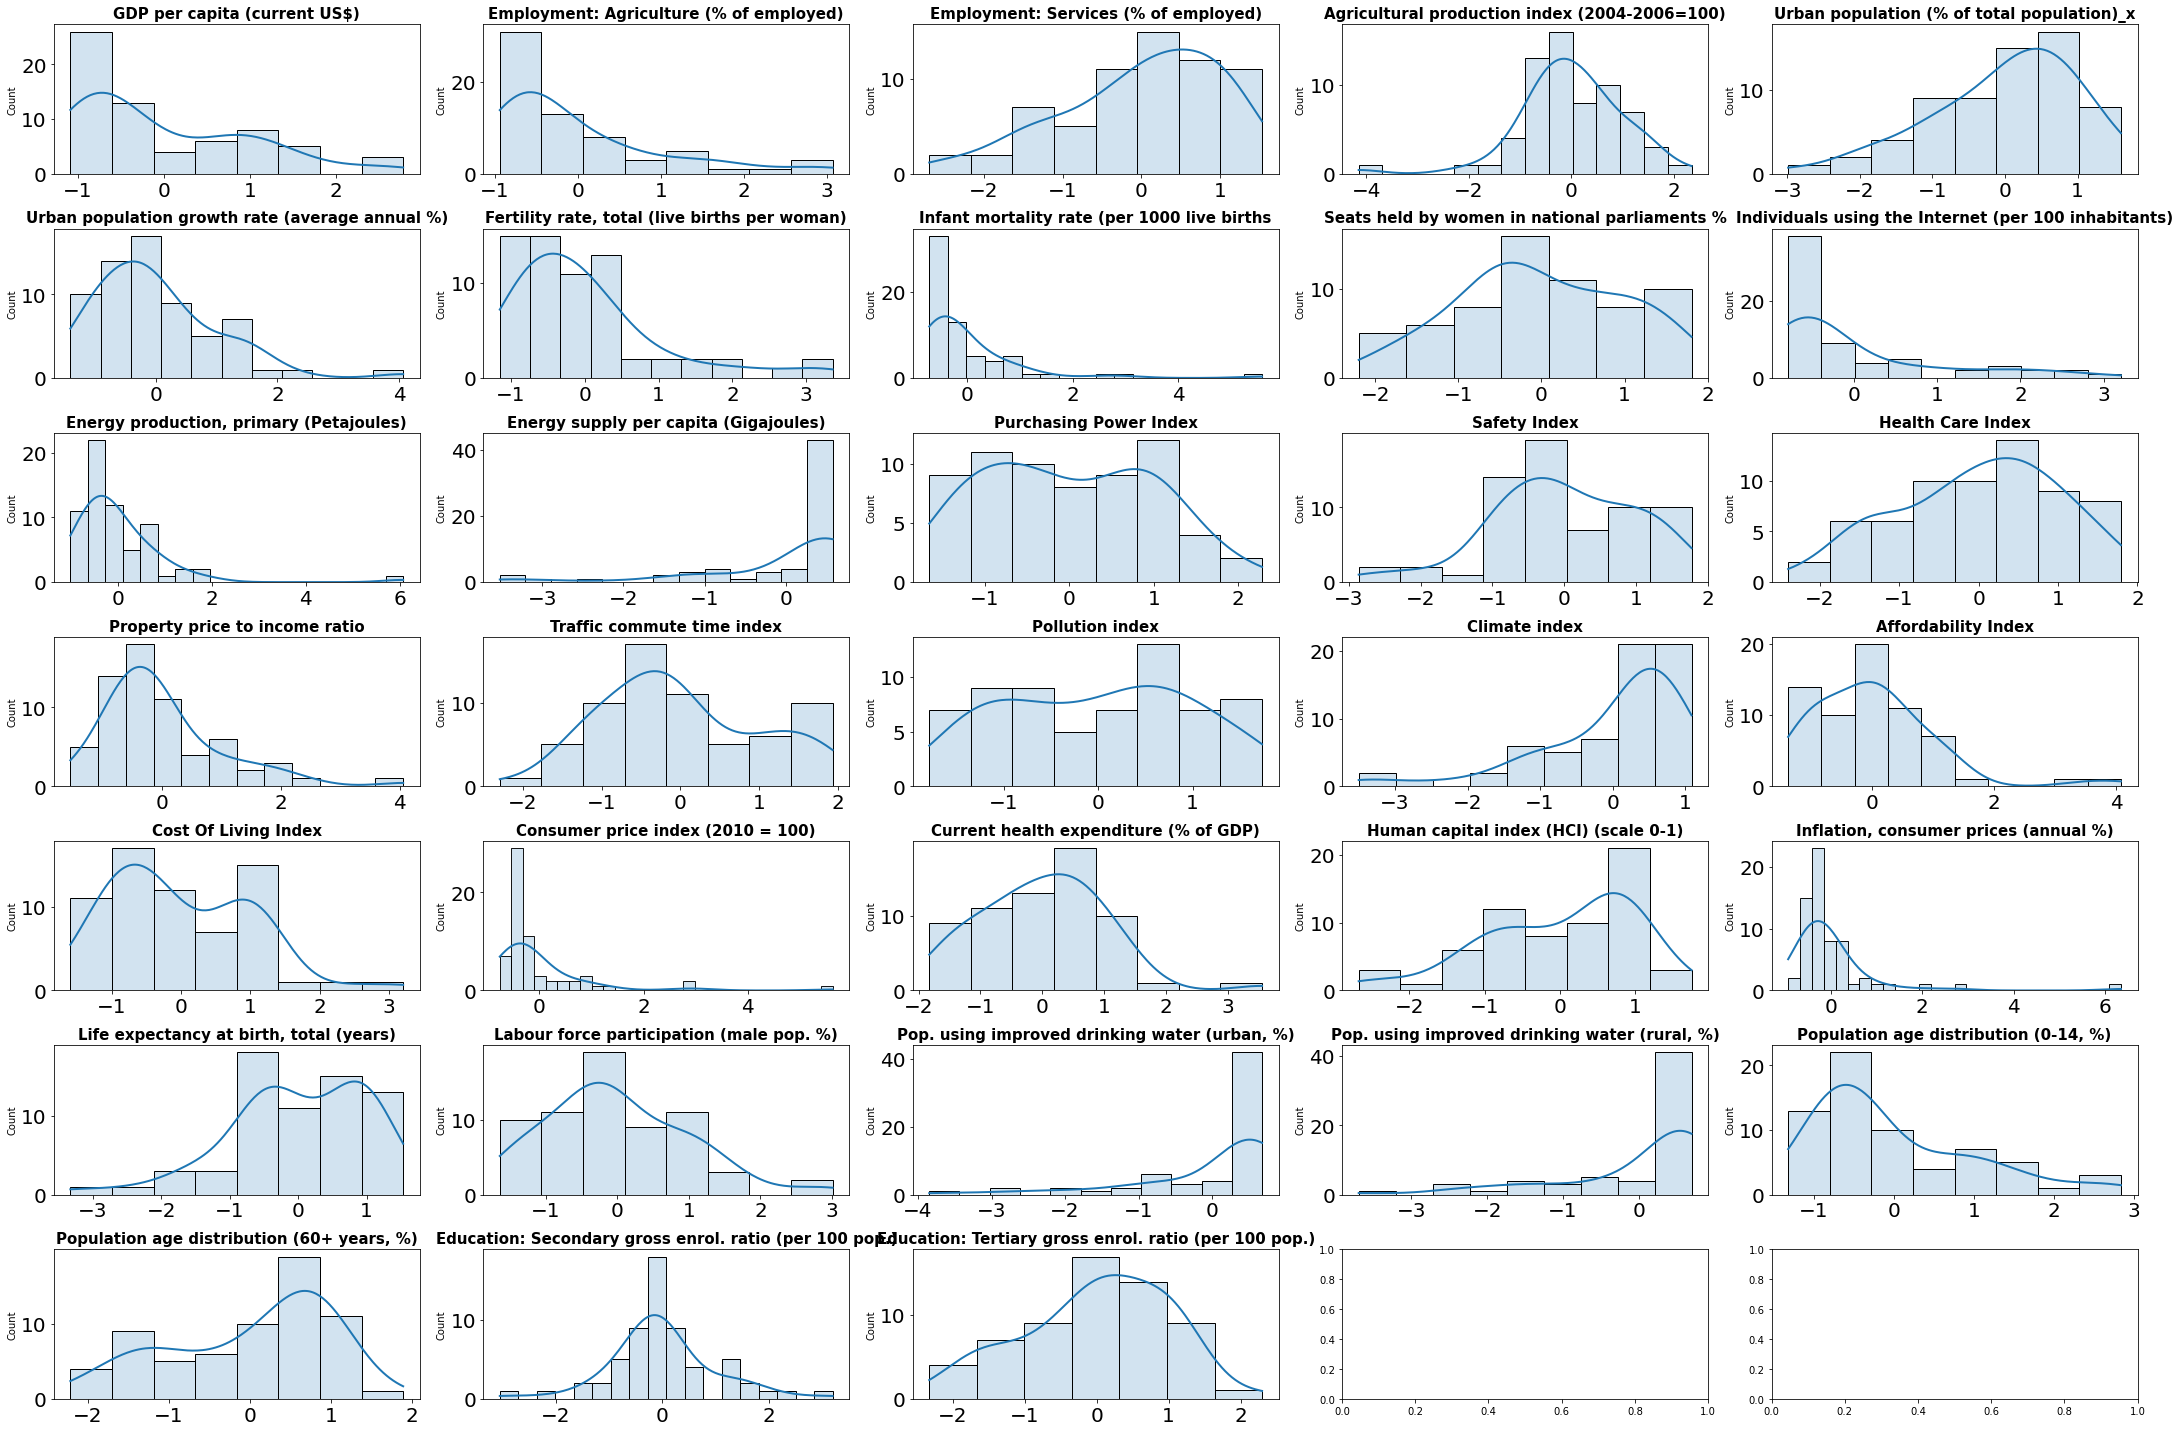

In [16]:
fig, axes = plt.subplots(nrows = 7, ncols = 5, figsize = (30, 20))

columnas_estandar = numericas_estandar.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout()

### Método RobustScaler

In [17]:
robust = RobustScaler()
robust.fit(numericas)
X_robust = robust.transform(numericas)
numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(2)

,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
0,-0.044150,-0.312,0.305085,0.444444,0.751055,0.000000,1.2,1.128205,1.053929,0.388199,-0.195652,-0.95,-0.280168,-1.295918,0.390441,0.246046,0.276836,0.017477,0.660287,-1.053191,0.071967,-0.023634,0.436826,-0.632987,NaN,-0.236043,0.534653,-0.257143,0.099849,0.975904,-0.443609,0.365591,0.570776
1,1.025798,-0.256,0.474576,0.000000,0.649789,0.384615,0.4,-0.128205,0.425270,2.537267,1.293478,0.05,0.633578,-0.150227,0.460294,-0.251318,-0.026365,-0.819983,0.210023,0.127660,0.887115,0.142905,0.458857,0.508172,-0.00589,0.758211,0.168317,0.285714,0.202723,0.265060,-0.022556,2.559140,0.803653


In [18]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna GDP per capita (current US$) es:  0.22223045534303812
La desviación estándar de la columna GDP per capita (current US$) es: 0.6015529056452039
-------------------------------------------------------------
La media de la columna Employment: Agriculture (% of employed) es:  0.37243076923076923
La desviación estándar de la columna Employment: Agriculture (% of employed) es: 0.8852615780312967
-------------------------------------------------------------
La media de la columna Employment: Services (% of employed) es:  -0.12890047805302057
La desviación estándar de la columna Employment: Services (% of employed) es: 0.7231748020579962
-------------------------------------------------------------
La media de la columna Agricultural production index (2004-2006=100) es:  -0.021367521367521382
La desviación estándar de la columna Agricultural production index (2004-2006=100) es: 1.0342183853355156
-------------------------------------------------------------
La media de l

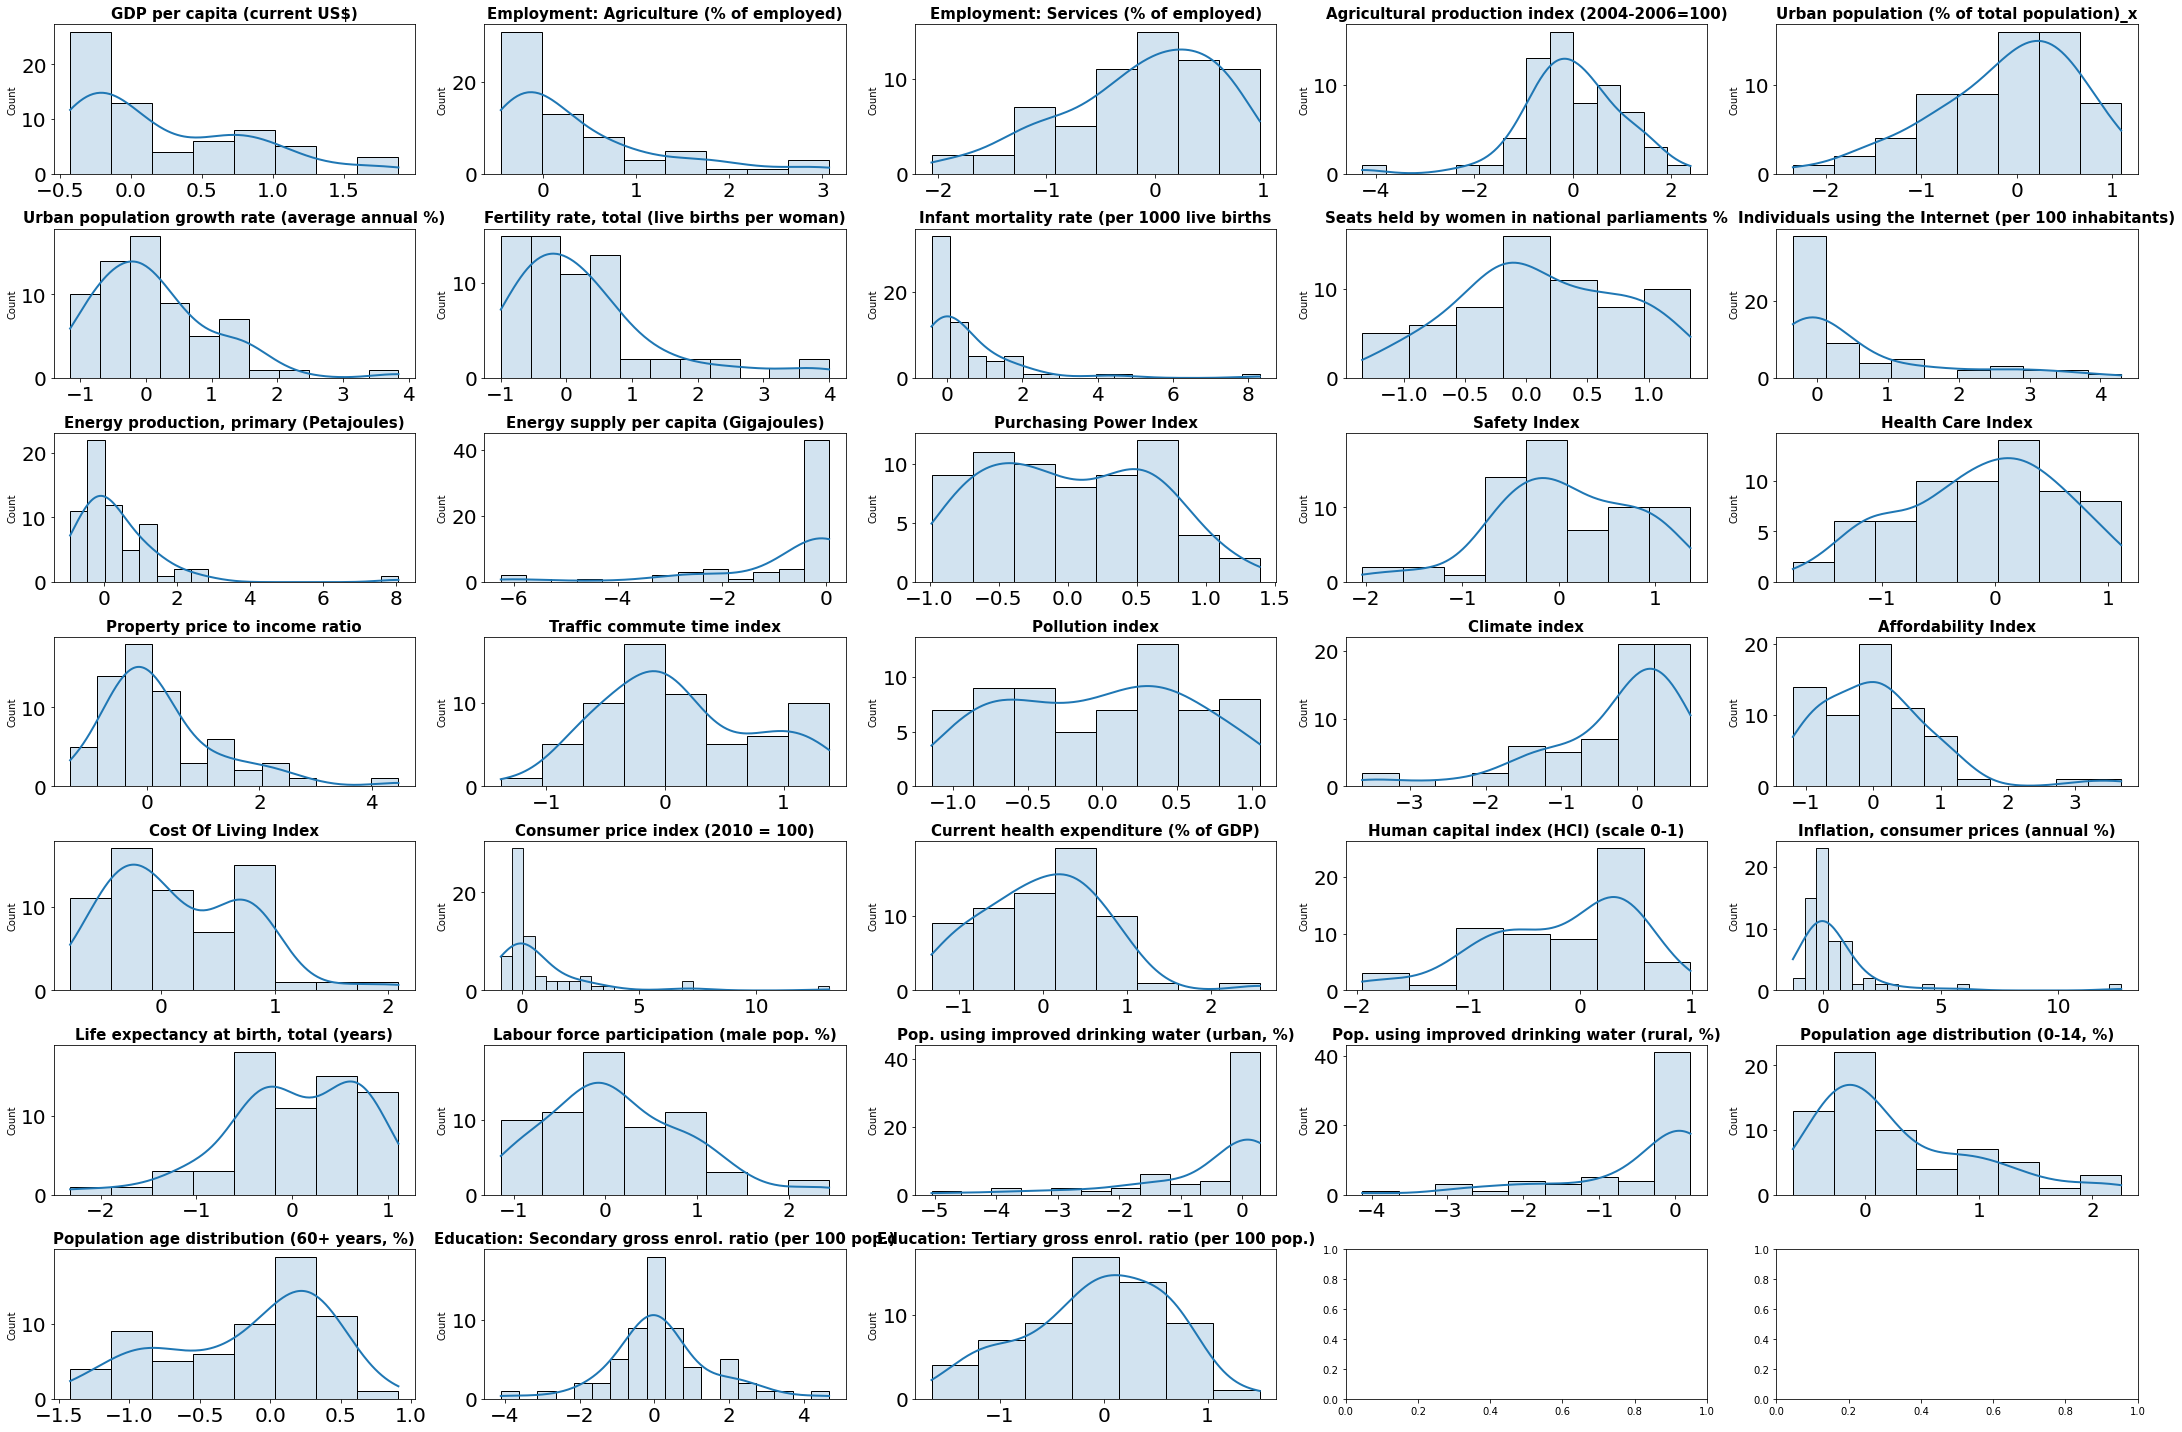

In [19]:
fig, axes = plt.subplots(nrows = 7, ncols = 5, figsize = (30, 20))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

In [20]:
df[numericas_estandar.columns] = numericas_estandar
df.head()

,country,Region,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
0,Argentina,SouthAmerica,-0.446268,-0.779156,0.604781,0.453905,1.136844,-0.141090,0.832595,0.403148,1.373669,-0.160445,-0.428847,-0.072257,139.59,-0.488363,-1.851319,0.742124,0.011008,0.241153,0.072085,1.046291,-1.225032,-0.142582,-0.361547,0.595817,-0.691809,NaN,-0.376146,0.534838,0.220883,0.590834,0.998345,-0.493168,0.128973,0.934014
1,Australia,Oceania,1.346217,-0.715406,0.840977,0.020821,1.001917,0.279591,0.111013,-0.501415,0.436646,1.692397,0.740796,0.579071,176.54,1.026816,-0.290193,0.842922,-0.464307,-0.221396,-1.270303,0.568435,0.097321,1.208398,-0.285638,0.626171,1.022784,-0.267149,1.033843,0.058083,0.681103,0.695233,-0.023719,0.248316,1.683651,1.274595
2,Austria,WesternEurope,0.993715,-0.533262,0.337093,-0.141585,-0.313618,-0.645907,-0.790965,-0.556796,0.611189,-0.529942,0.194393,0.579071,190.37,0.808274,1.499580,1.549575,-0.393766,-1.436664,-1.395437,0.283539,0.430887,0.768812,-0.331380,1.068892,0.933482,-0.235311,0.836864,-0.573296,0.681103,0.695233,-0.872553,0.791188,-0.219051,0.869460
3,Belarus,EasternEurope,-0.875716,-0.087009,-0.552576,0.616312,0.287930,-0.982452,-0.430174,-0.529105,0.969463,-0.778952,-0.112958,0.513938,119.23,-1.252913,1.267072,-1.331147,1.129593,-1.236993,-0.567125,-0.840544,-1.379902,-1.043396,NaN,-0.593477,NaN,0.713100,-0.892175,-0.315590,-0.033450,0.400460,-0.422151,0.288038,0.141675,1.161068
4,Belgium,WesternEurope,0.806616,-0.852014,0.959074,-0.141585,1.479782,-0.561771,-0.069383,-0.538335,1.290990,-0.746821,0.518820,0.579071,160.52,0.646803,-0.451635,1.338428,-0.847246,-0.001613,-0.133826,0.631775,1.086107,0.953496,-0.354991,1.047345,0.611996,-0.224579,0.802070,-1.462381,0.620547,0.658386,-0.352859,0.724984,3.187522,0.577852


- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [22]:
df.to_csv('datos/soci_econ_country_profiles_v5.csv')